# Bayesian exploration using script

In [1]:
# main function
import matplotlib.pyplot as plt
%matplotlib inline

import os
SMOKE_TEST = os.environ.get('SMOKE_TEST')

from xopt.algorithms.functional import run_algortihm
from xopt.generators.bayesian.generator import BayesianExploration

# test function
from xopt.tests.test_functions import TNK

In [2]:
# To see log messages
from xopt import output_notebook
output_notebook()

In [3]:
# Get VOCS
vocs = TNK.VOCS
print(vocs)

# technically this is not necessary, but its good to be explict
vocs['objectives'] = {'y1' : None}

# Get evaluate function
EVALUATE = TNK.evaluate_TNK

n_steps = 30


if SMOKE_TEST:
    generator_options = {'batch_size': 1,
                           'num_restarts': 2,
                           'raw_samples': 2}
    n_steps = 3

# create generator object
generator = BayesianExploration(vocs, n_steps)

# Run - see comments for example options
alg = run_algortihm(vocs, generator, function=EVALUATE,
                    n_initial_samples=5)

{'name': 'TNK_test', 'description': 'Constrainted test function TNK. See Table V in https://www.iitk.ac.in/kangal/Deb_NSGA-II.pdf', 'simulation': 'test_TNK', 'variables': {'x1': [0, 3.14159], 'x2': [0, 3.14159]}, 'objectives': {'y1': 'MINIMIZE', 'y2': 'MINIMIZE'}, 'constraints': {'c1': ['GREATER_THAN', 0], 'c2': ['LESS_THAN', 0.5]}, 'constants': {'a': 'dummy_constant'}}
Generating and submitting initial samples
generating samples
collecting results
generating samples
collecting results
generating samples
collecting results
generating samples
collecting results
generating samples
collecting results
generating samples
collecting results
generating samples
collecting results
generating samples
collecting results
generating samples
collecting results
generating samples
collecting results
generating samples
collecting results
generating samples
collecting results
generating samples
collecting results
generating samples
collecting results
generating samples
collecting results
generating samp

Index(['x1', 'x2', 'a', 'y1', 'y2', 'c1', 'c2', 'some_array', 'status', 'x1_t',
       'x2_t', 'y1_t', 'c1_t', 'c2_t', 'c1_f', 'c2_f', 'feasibility'],
      dtype='object')
          x1        x2
0   0.689923  2.818579
1   1.468700  1.647553
2   0.245374  1.425126
3   1.826021  2.461516
4   2.952752  0.723516
5   0.000000  0.599210
6   0.868526  0.382821
7   0.789513  1.226318
8   1.140497  0.596205
9   0.514333  1.036685
10  0.922746  0.834307
11  1.075814  0.259545
12  0.267086  1.071238
13  1.028776  0.110666
14  0.095931  1.036788
15  1.171484  0.489392
16  0.643939  0.881040
17  1.026912  0.911784
18  1.035274  0.084570
19  0.358644  0.978081
20  0.088472  1.048224
21  0.577010  1.171428
22  1.177378  0.421430
23  0.752236  0.759235
24  1.037500  0.919982
25  1.035950  0.071743
26  0.313792  1.002644
27  0.068759  1.039358
28  1.182905  0.416066
29  0.805710  1.112273
30  0.948392  0.516985
31  0.520749  1.184888
32  0.622141  0.816497
33  1.036797  0.067459
34  1.120334  0.791336

Text(0, 0.5, '$x_2$')

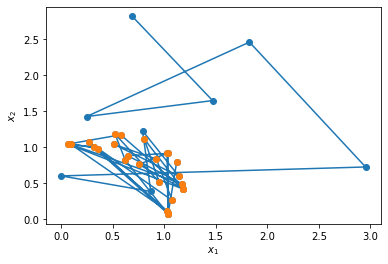

In [4]:
# plot exploration results and path - exploration should explore the feasible region of the TNK problem - See Table V in https://www.iitk.ac.in/kangal/Deb_NSGA-II.pdf
fig, ax = plt.subplots()
results = alg.data
variables = results[vocs['variables']]
valid = results[vocs['variables']][results['feasibility']]
ax.plot(variables['x1'], variables['x2'], '-o')
ax.plot(valid['x1'], valid['x2'], 'o')
ax.set_xlabel('$x_1$')
ax.set_ylabel('$x_2$')

### Bayesian exploration with proximal biasing
- should result in a smoother path through input space

In [5]:
# create generator object
generator = BayesianExploration(vocs, n_steps, sigma=[0.1, 0.1])

# Run - see comments for example options
alg = run_algortihm(vocs, generator, function=EVALUATE,
                    n_initial_samples=5)

Generating and submitting initial samples
generating samples
collecting results
generating samples
collecting results
generating samples
collecting results
generating samples
collecting results
generating samples
collecting results
generating samples
collecting results
generating samples
collecting results
generating samples
collecting results
generating samples
collecting results
generating samples
collecting results
generating samples
collecting results
generating samples
collecting results
generating samples
collecting results
generating samples
collecting results
generating samples
collecting results
generating samples
collecting results
generating samples
collecting results
generating samples
collecting results
generating samples
collecting results
generating samples
collecting results
generating samples
collecting results
generating samples
collecting results
generating samples
collecting results
generating samples
collecting results
generating samples
collecting results
generati

Text(0, 0.5, '$x_2$')

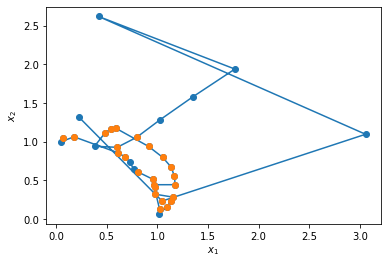

In [7]:
# plot exploration results and path - exploration should explore the feasible region of the TNK problem - See Table V in https://www.iitk.ac.in/kangal/Deb_NSGA-II.pdf
fig, ax = plt.subplots()
results = alg.data
variables = results[vocs['variables']]
valid = results[vocs['variables']][results['feasibility']]
ax.plot(variables['x1'], variables['x2'], '-o')
ax.plot(valid['x1'], valid['x2'], 'o')
ax.set_xlabel('$x_1$')
ax.set_ylabel('$x_2$')